## Prophet Model

- trend, seasonality, holidays이라는 세 가지 구성 요소로 나누어지는 시계열 모델

$$
y(t) = g(t) + s(t) + h(t) + \epsilon_t
$$

- $g(t)$는 시계열 값에서 비주기적 변화를 나타내는 추세 함수를 나타낸다.

- $s(t)$는 매주 혹은 매년 반복되는 계절적 변화를 나타낸다.

- $h(t)$는 공휴일과 같이 불규칙적 일정으로 특정 기간 동안 발생하는 이벤트가 시계열에 미치는 영향을 나타낸다.

### The Trend Model

- Nonlinear, Saturating Growth
    - 포화 용량(carrying capacity)에 도달하면 증가가 제한되는 비선형 성장  
    - Logistic growth model  
$$ g(t) = \frac{C}{1 + exp({-k(t-m)})} $$ 
$$ C는\ 포화\ 용량(carrying\ capacity) $$
$$ k는\ 성장률(growth\ rate) $$  
$$ m은\ 오프셋(offset)\ 파라미터 $$

- 실제로는 포화 용량 $C$가 시간에 따라 달라지거나, 성장률 $k$ 역시 고정적이지 않으므로 단순 로지스틱 모델만으로는 이런 복잡한 현실을 완전히 표현하기 어렵다.

- growth model에서 추세 변화를 허용하기 위해, 성장률이 바뀔 수 있는 changepoint를 명시적으로 정의한다.

- 시점 $s_j, (j = 1, \cdots, S)$에서 $S$개의 changepoint가 있다고 가정한다.

- 비율 조정값의 벡터 $\delta \in \mathbb{R}^s$를 정의하는데, 여기서 $\delta_j$는 시점 $s_j$에서 발생하는 성장률의 변화분을 의미한다.

- 비율 $k$의 조정:
$$
k + \sum_{j : t \ge s_j} \delta_j 
\quad\Longrightarrow\quad
a(t) \in \{0,1\}^S \text{, 단 } a_j(t) = 
\begin{cases}
1, & \text{if } t \ge s_j\\
0, & \text{otherwise}
\end{cases},
\quad
k + a(t)^T \delta
$$


- 오프셋(offset) 파라미터 m 역시 구간들의 끝점을 자연스럽게 연결하기 위해 조정되어야 한다.

- 오프셋(offset) 파라미터 m 조정
$$
m + a(t)^T\gamma
$$
$$
\gamma_j
=
\bigl(s_j - m - \sum_{l<j}\gamma_l\bigr)
\Bigl(
  1 - \frac{k + \sum_{l<j}\delta_l}{\,k + \sum_{l \le j}\delta_l}
\Bigr)
$$

- 이후 Logistic growth model은 다음과 같다.
$$
g(t)
=
\frac{C(t)}{
  1
  + \exp\!\Bigl(
    -\bigl(k + a(t)^T \delta\bigr)\,
     \bigl(t - \bigl(m + a(t)^T \gamma\bigr)\bigr)
  \Bigr)
}
$$

- 오프셋(offset) 파라미터 유도

changepoint 전 구간에서의 성장률은 $k_{j-1} = k + \sum_{l < j}\delta_l$이고, changepoint 후 구간에서는 $k_j = k + \sum_{l <= j}\delta_l$이다.  

logistic 함수가 끊기지 않고 이어지도록 하기 위해서는 이전 구간의 logistic 함수가 $s_j$에서 가지는 값과 다음 구간의 logistic 함수가 $s_j$에서 가지는 값이 서로 동일해야 하므로 $(k + \sum_{l < j}\delta_l)(s_j - m_{j-1}) = (k + \sum_{j <= j}\delta_l)(s_j - (m_{j-1} - \gamma_j))$이다.  

$a = k + \sum_{l < j}\delta_l,\ b = s_j - m_{j-1}$로 놓고 정리하면 $ab = (a + \delta_j)(b - \gamma_j)$이다. 따라서 $\gamma_j = \frac{b\delta_j}{a + \delta_j} = \frac{(s_j - m_{j-1})\delta_j}{k + \sum_{l <=j}\delta_l}$이다.  

$1 - \frac{k + \sum_{l < j}\delta_l}{k + \sum_{l <= j}\delta_l} = \frac{(k + \sum_{l <= j}\delta_l) - (k + \sum_{l < j}\delta_l)}{k + \sum_{l <= j}\delta_l} = \frac{\sum_{l <= j}\delta_l - \sum_{l < j}\delta_l}{k + \sum_{l <=j}\delta_l} = \frac{\delta_j}{k + \sum_{l <= j}\delta_l}$이고  

$m_{j-1} = m + \sum_{l < j} \gamma_l$이므로  

$\gamma_j = (1 - \frac{k + \sum_{l < j}\delta_l}{k + \sum_{l <= j}\delta_l})(s_j - (m + \sum_{l < j}\gamma_l))$이다.

- 포화 성장(saturating growth)이 나타나지 않을 때는 다음 식을 사용한다.

$$g(t) = (k + a(t)^T\delta)t + (m + a(t)^T\gamma)$$
$$k는\ 성장률(growth rate)$$
$$\delta는\ 성장률\ 조정값(rate adjustments)$$
$$m은\ 오프셋\ 파라미터(offset parameter)$$
$$\gamma_j는\ 연속성을\ 유지하기\ 위해\ -s_j\delta_j로\ 설정$$

- 추세 예측의 불확실성
$$
\forall j > T,\;\;
\begin{cases}
\delta_j = 0 \quad \text{with probability } \frac{T - s}{T},\\[6pt]
\delta_j \sim \mathrm{Laplace}(0, \lambda) \quad \text{with probability } \frac{s}{T}
\end{cases}
$$


### Seasonality

- 주기적인 효과를 유연하게 모델링하기 위해 푸리에(Fourier) 급수에 의존한다.

- 시계열의 주기를 P라고 하면, 연간은 P = 365.25, 주간은 P = 7로 사용한다.

$$ 
s(t) = \sum_{n=1}^{N} \Bigl( 
    a_n \cos\!\Bigl(\frac{2 \pi n t}{P}\Bigr)
    \;+\;
    b_n \sin\!\Bigl(\frac{2 \pi n t}{P}\Bigr)
\Bigr)
$$

- 계절성 파라미터는 $a_n$, $b_n$을 합쳐 총 2N개를 추정해야 한다.

- 연단위 계절성은 주로 N = 10, 주단위 계절성은 주로 N = 3 정도면 대부분 문제에서 잘 동작한다.

## Holidays

- 휴일과 이벤트는 많은 비즈니스 시계열에 큰 영향을 주며, 어느 정도 예측 가능하지만 주기적 패턴을 따르지 않는 경우가 많다.

- Thanksgiving in the U.S.

- The Super Bowl (Sunday in January or Feburary)

- Lunar calendar holidays

- 각 휴일 i에 대해, 해당 휴일이 있었거나(과거) 있을(미래) 모든 날짜들의 집합을 $D_i$라고 하자.

$$Z(t) = \bigl[1(t \in D_1), \dots, 1(t \in D_L)\bigr]$$
$$h(t) = Z(t)\,\kappa, 
\quad \text{with prior } \kappa \sim \mathrm{Normal}(0,\nu^2)$$

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

## (1) Data Preprocessing

In [2]:
df = pd.read_csv('./data/air_passengers.csv')
df['Month'] = pd.DatetimeIndex(df['Month'])

<Axes: >

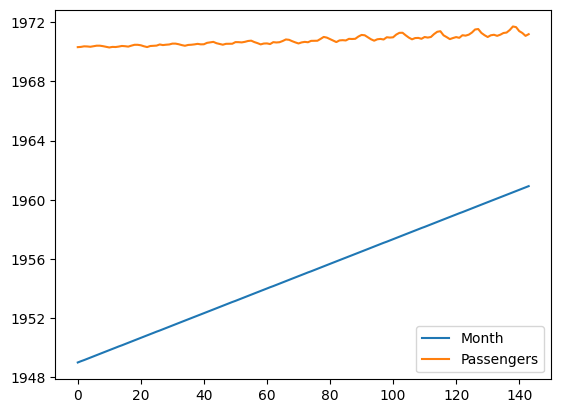

In [3]:
df.plot()

### Prophet imposes the strict condition that the input columns must be named as ds (the time column) and y (the metric column).

In [5]:
df = df.rename(columns={'Month': 'ds',
                        'Passengers': 'y'})
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


## (2) Time Series Forecasting with Prophet

In [6]:
my_model = Prophet(interval_width=0.95)

In [7]:
my_model.fit(df)

11:27:33 - cmdstanpy - INFO - Chain [1] start processing
11:27:33 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01


In [9]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,84.814159,43.218534,130.939580
1,1949-02-01,78.227931,34.798478,124.970298
2,1949-03-01,110.342237,69.879870,152.305477
3,1949-04-01,107.810718,64.658736,150.696929
4,1949-05-01,111.266255,67.296472,160.590609


### Forecasted values: blue line
### Observed values: black dots
### Uncertainty intervals: blue shaded regions

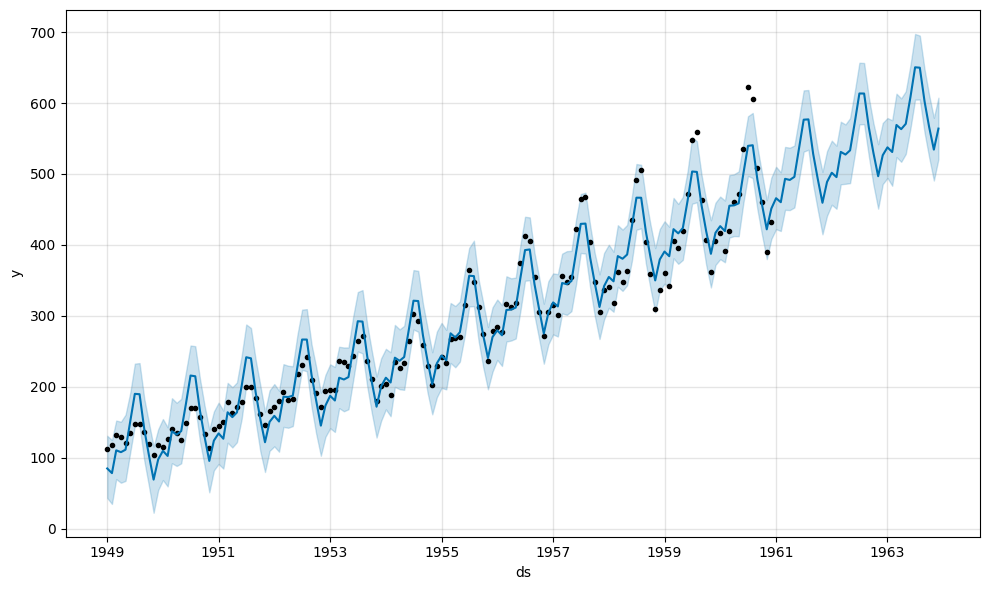

In [10]:
my_model.plot(forecast, uncertainty=True);

### Decomposition

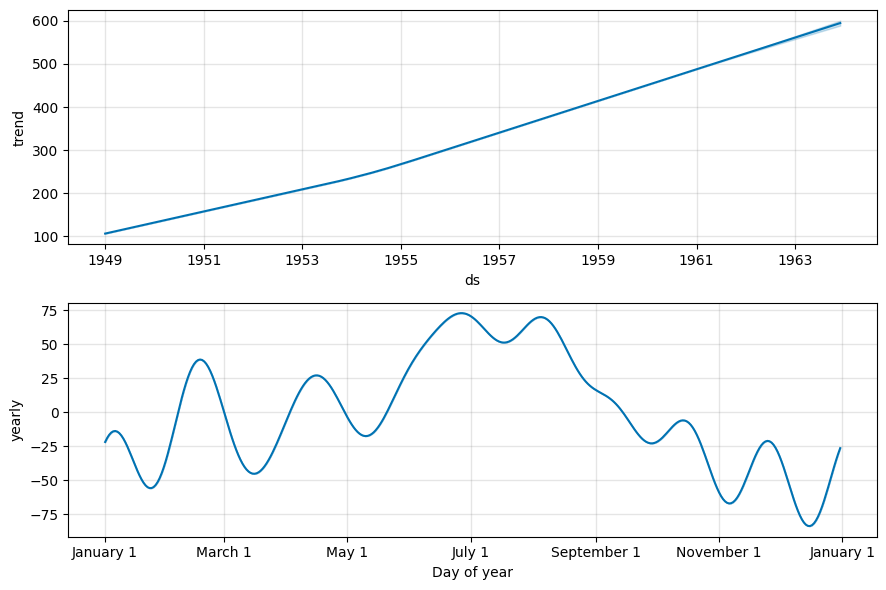

In [11]:
my_model.plot_components(forecast);

### Adding ChangePoints to Prophet

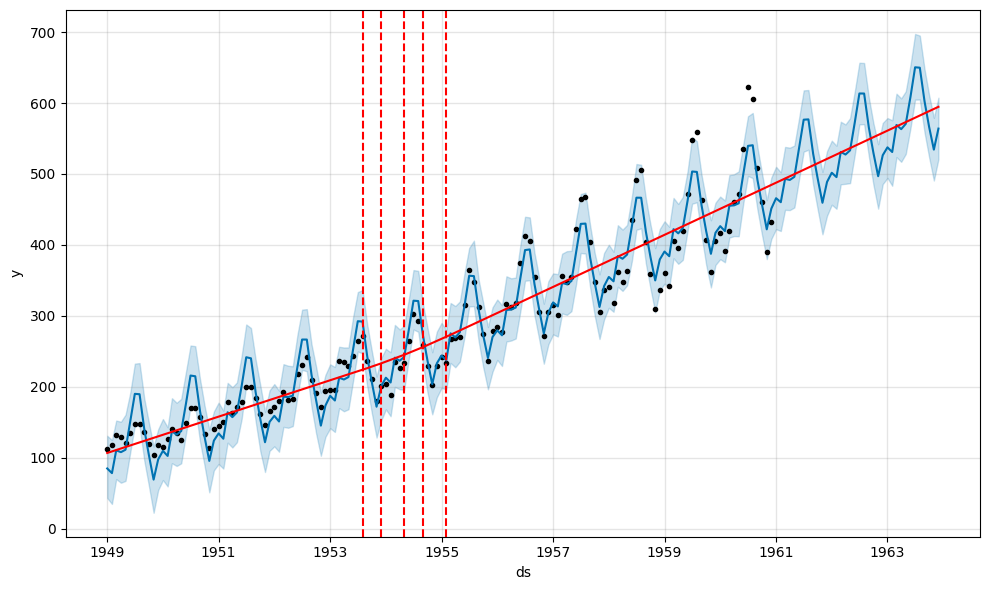

In [13]:
from prophet.plot import add_changepoints_to_plot

fig = my_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), my_model, forecast)

In [14]:
my_model.changepoints

5     1949-06-01
9     1949-10-01
14    1950-03-01
18    1950-07-01
23    1950-12-01
27    1951-04-01
32    1951-09-01
36    1952-01-01
41    1952-06-01
46    1952-11-01
50    1953-03-01
55    1953-08-01
59    1953-12-01
64    1954-05-01
68    1954-09-01
73    1955-02-01
78    1955-07-01
82    1955-11-01
87    1956-04-01
91    1956-08-01
96    1957-01-01
100   1957-05-01
105   1957-10-01
109   1958-02-01
114   1958-07-01
Name: ds, dtype: datetime64[ns]

11:34:43 - cmdstanpy - INFO - Chain [1] start processing
11:34:43 - cmdstanpy - INFO - Chain [1] done processing


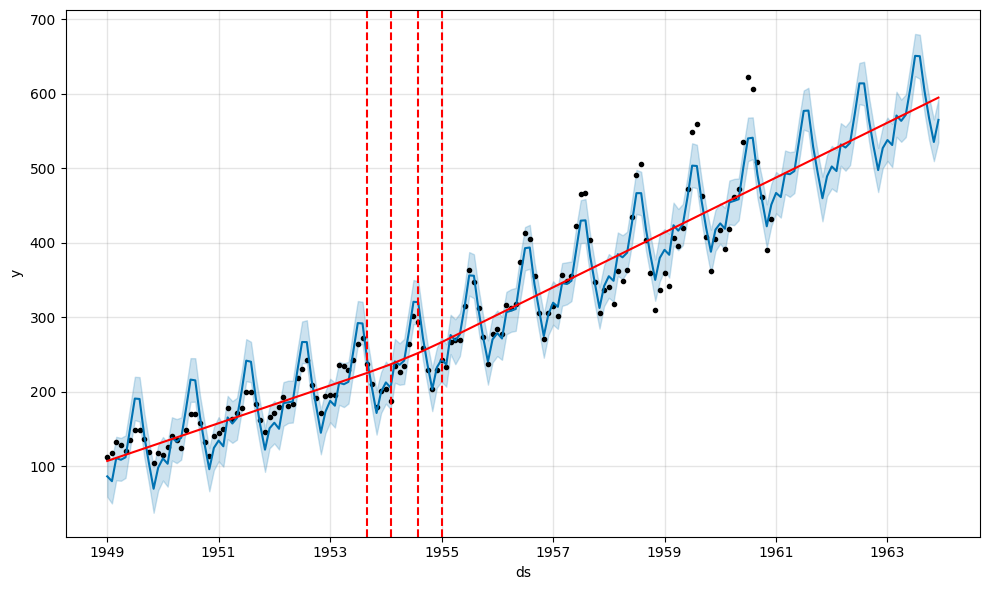

In [15]:
pro_change = Prophet(changepoint_range=0.9)
forecast = pro_change.fit(df).predict(future_dates)
fig = pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [16]:
pro_change.changepoints

5     1949-06-01
10    1949-11-01
15    1950-04-01
20    1950-09-01
26    1951-03-01
31    1951-08-01
36    1952-01-01
41    1952-06-01
46    1952-11-01
51    1953-04-01
56    1953-09-01
61    1954-02-01
67    1954-08-01
72    1955-01-01
77    1955-06-01
82    1955-11-01
87    1956-04-01
92    1956-09-01
97    1957-02-01
102   1957-07-01
108   1958-01-01
113   1958-06-01
118   1958-11-01
123   1959-04-01
128   1959-09-01
Name: ds, dtype: datetime64[ns]

11:36:39 - cmdstanpy - INFO - Chain [1] start processing
11:36:39 - cmdstanpy - INFO - Chain [1] done processing


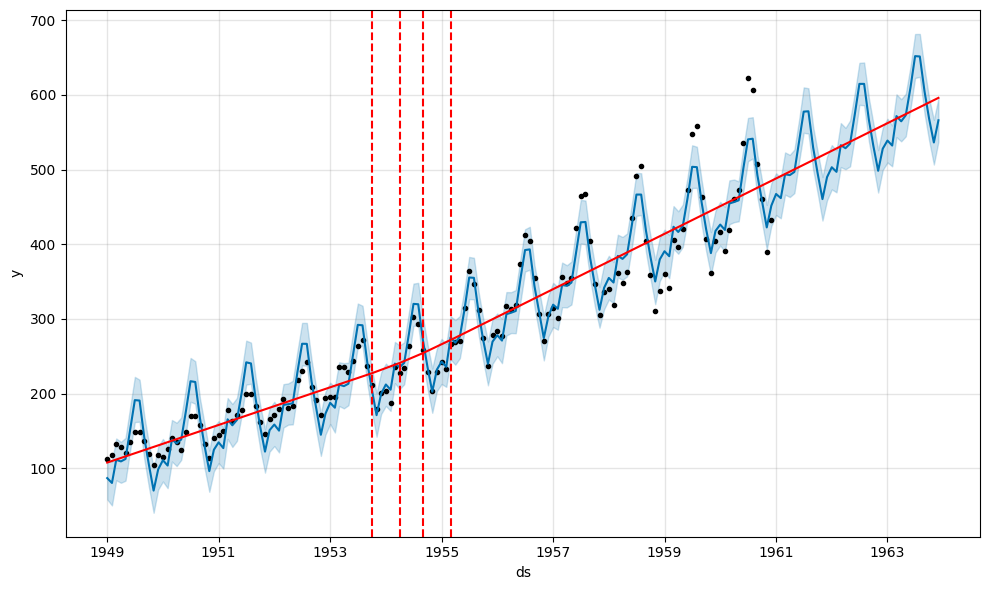

In [17]:
pro_change = Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(df).predict(future_dates)
fig = pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

In [18]:
pro_change.changepoints

6     1949-07-01
11    1949-12-01
17    1950-06-01
23    1950-12-01
28    1951-05-01
34    1951-11-01
40    1952-05-01
46    1952-11-01
51    1953-04-01
57    1953-10-01
63    1954-04-01
68    1954-09-01
74    1955-03-01
80    1955-09-01
86    1956-03-01
91    1956-08-01
97    1957-02-01
103   1957-08-01
108   1958-01-01
114   1958-07-01
Name: ds, dtype: datetime64[ns]